## LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

dataset = pd.read_csv("sequential_data/5min_2.csv")
dataset

,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL
0,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
1,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
2,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
3,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
4,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3818,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3819,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3820,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0
3821,2024-11-19,00:00:00,0,0,0,1,0,0,0,0,0,0


In [2]:
dataset.shape

(3823, 12)

In [3]:
# dataset = dataset.drop([0])

## Data cleaning

In [4]:

df = dataset.drop_duplicates(subset=["TIME"])
df = df.reset_index()
df.shape

(288, 13)

In [5]:
df[100:150]

,index,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL
100,1398,2024-11-18,08:25:00,0,0,1,6,1,2,5,1,2,18
101,1412,2024-11-18,08:30:00,0,0,3,11,0,3,3,3,2,25
102,1426,2024-11-18,08:35:00,1,0,1,3,0,4,7,1,1,18
103,1440,2024-11-18,08:40:00,0,0,3,7,1,4,3,1,2,21
104,1453,2024-11-18,08:45:00,0,0,6,7,2,1,6,1,3,26
105,1467,2024-11-18,08:50:00,1,0,5,7,1,3,8,3,3,31
106,1482,2024-11-18,08:55:00,1,0,5,8,0,3,4,1,3,25
107,1496,2024-11-18,09:00:00,0,1,3,6,1,4,4,1,2,22
108,1510,2024-11-18,09:05:00,2,0,5,10,2,4,6,1,4,34
109,1524,2024-11-18,09:10:00,0,1,4,4,0,4,7,3,3,26


In [7]:
df['datetime'] = df['DATE'] + " " + df['TIME']

df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df

,index,DATE,TIME,BICYCLE,BUS,CAR,JEEPNEY,MOTORCYCLE,MULTICAB,TRICYCLE,TRUCK,VAN,TOTAL,datetime
datetime,,,,,,,,,,,,,,
2024-11-18 00:05:00,0,2024-11-18,00:05:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:05:00
2024-11-18 00:10:00,14,2024-11-18,00:10:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:10:00
2024-11-18 00:15:00,28,2024-11-18,00:15:00,0,0,0,1,0,0,0,0,0,1,2024-11-18 00:15:00
2024-11-18 00:20:00,42,2024-11-18,00:20:00,0,0,0,1,0,0,0,0,0,0,2024-11-18 00:20:00
2024-11-18 00:25:00,56,2024-11-18,00:25:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 00:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-18 23:40:00,3759,2024-11-18,23:40:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:40:00
2024-11-18 23:45:00,3772,2024-11-18,23:45:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:45:00
2024-11-18 23:50:00,3785,2024-11-18,23:50:00,0,0,0,0,0,0,0,0,0,0,2024-11-18 23:50:00


In [8]:
df[['INTERVAL_COUNT']] = df[['TOTAL']]
df = df[['INTERVAL_COUNT']]
df

,INTERVAL_COUNT
datetime,
2024-11-18 00:05:00,0
2024-11-18 00:10:00,0
2024-11-18 00:15:00,1
2024-11-18 00:20:00,0
2024-11-18 00:25:00,0
...,...
2024-11-18 23:40:00,0
2024-11-18 23:45:00,0
2024-11-18 23:50:00,0


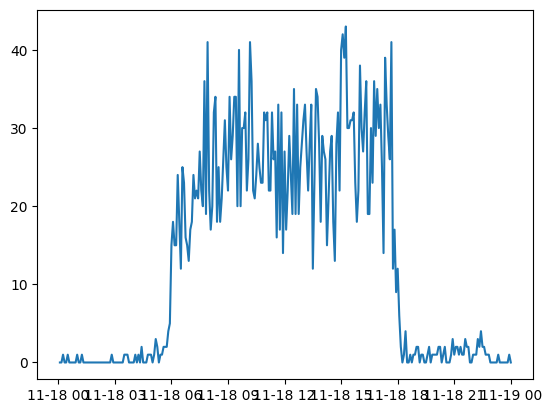

In [13]:
interval_count = df['INTERVAL_COUNT']
plt.plot(interval_count)

## TRAINING LSTM MODEL

In [11]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

### LSTM

In [24]:
from copy import deepcopy as dc

def trasform_to_series(df, n_steps):
    df = dc(df)

    

    for i in range(1, n_steps+1):
        df[f'INTERVAL_COUNT(t-{i})'] = df['INTERVAL_COUNT'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 6
timeseries_df = trasform_to_series(df, lookback)

timeseries_df

,INTERVAL_COUNT,INTERVAL_COUNT(t-1),INTERVAL_COUNT(t-2),INTERVAL_COUNT(t-3),INTERVAL_COUNT(t-4),INTERVAL_COUNT(t-5),INTERVAL_COUNT(t-6)
datetime,,,,,,,
2024-11-18 00:35:00,0,1.0,0.0,0.0,1.0,0.0,0.0
2024-11-18 00:40:00,0,0.0,1.0,0.0,0.0,1.0,0.0
2024-11-18 00:45:00,0,0.0,0.0,1.0,0.0,0.0,1.0
2024-11-18 00:50:00,0,0.0,0.0,0.0,1.0,0.0,0.0
2024-11-18 00:55:00,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
2024-11-18 23:40:00,0,0.0,0.0,0.0,1.0,0.0,0.0
2024-11-18 23:45:00,0,0.0,0.0,0.0,0.0,1.0,0.0
2024-11-18 23:50:00,0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
timeseries_df_as_np = timeseries_df.to_numpy()

timeseries_df_as_np

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(-1, 1))
timeseries_df_as_np = scaler.fit_transform(timeseries_df_as_np)

timeseries_df_as_np

array([[-1.        , -0.95348837, -1.        , ..., -0.95348837,
        -1.        , -1.        ],
       [-1.        , -1.        , -0.95348837, ..., -1.        ,
        -0.95348837, -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.95348837],
       ...,
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -0.95348837],
       [-0.95348837, -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -0.95348837, -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [27]:
X = timeseries_df_as_np[:, 1:]
y = timeseries_df_as_np[:, 0]

X.shape, y.shape

((282, 6), (282,))

In [28]:
X = dc(np.flip(X, axis=1))
X

array([[-1.        , -1.        , -0.95348837, -1.        , -1.        ,
        -0.95348837],
       [-1.        , -0.95348837, -1.        , -1.        , -0.95348837,
        -1.        ],
       [-0.95348837, -1.        , -1.        , -0.95348837, -1.        ,
        -1.        ],
       ...,
       [-0.95348837, -1.        , -1.        , -1.        , -1.        ,
        -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.95348837]])

In [29]:
split_index = int(len(X) * 0.95)

split_index

267

In [30]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((267, 6), (15, 6), (267,), (15,))

In [31]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((267, 6, 1), (15, 6, 1), (267, 1), (15, 1))

In [32]:
# convert to pytorch tensors

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([267, 6, 1]),
 torch.Size([15, 6, 1]),
 torch.Size([267, 1]),
 torch.Size([15, 1]))

In [33]:
from torch.utils.data import Dataset

class TrafficVolumeTimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TrafficVolumeTimeSeriesDataset(X_train, y_train)
test_dataset = TrafficVolumeTimeSeriesDataset(X_test, y_test)

In [34]:
train_dataset

In [35]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 6, 1]) torch.Size([16, 1])


In [46]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 8, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 8, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [47]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 10 == 9:  # print every 100 batches
            avg_loss_across_batches = running_loss / 10
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [48]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [49]:
learning_rate = 0.01
num_epochs = 100
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 10, Loss: 0.474

Val Loss: 0.078
***************************************************

Epoch: 2
Batch 10, Loss: 0.150

Val Loss: 0.011
***************************************************

Epoch: 3
Batch 10, Loss: 0.072

Val Loss: 0.002
***************************************************

Epoch: 4
Batch 10, Loss: 0.071

Val Loss: 0.002
***************************************************

Epoch: 5
Batch 10, Loss: 0.073

Val Loss: 0.001
***************************************************

Epoch: 6
Batch 10, Loss: 0.055

Val Loss: 0.002
***************************************************

Epoch: 7
Batch 10, Loss: 0.062

Val Loss: 0.001
***************************************************

Epoch: 8
Batch 10, Loss: 0.075

Val Loss: 0.001
***************************************************

Epoch: 9
Batch 10, Loss: 0.078

Val Loss: 0.001
***************************************************

Epoch: 10
Batch 10, Loss: 0.059

Val Loss: 0.001
******************************************

In [2]:
from sklearn.metrics import r2_score, mean_squared_error

print ('R-Squared:',r2_score(y_train, predicted))
print ('Mean squared error:', mean_squared_error (y_train, predicted))

NameError: name 'y_train' is not defined

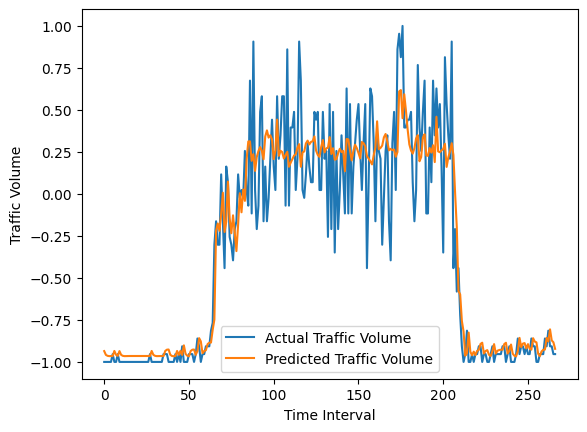

In [50]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Traffic Volume')
plt.plot(predicted, label='Predicted Traffic Volume')
plt.xlabel('Time Interval')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

In [52]:
# turn the data from numpy back to normal

train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 1.38648674,  0.90089568,  0.77691442,  0.74188718,  0.75109476,
        0.75683972,  1.40534401,  0.90816435,  0.77870339,  1.38648674,
        0.90089568,  0.77691442,  0.74188718,  0.75109476,  0.75683972,
        0.75836983,  0.75836983,  0.75836983,  0.75836983,  0.75836983,
        0.75836983,  0.75836983,  0.75836983,  0.75836983,  0.75836983,
        0.75836983,  0.75836983,  0.75836983,  1.40534401,  0.90816435,
        0.77870339,  0.74188718,  0.75109476,  0.75683972,  0.75836983,
        0.75836983,  1.40534401,  1.5683431 ,  1.58853826,  0.91385037,
        0.75516993,  0.73277059,  0.74955952,  1.40369728,  0.90816435,
        1.42463699,  0.89201105,  2.12402579,  1.03299397,  0.79556665,
        0.72309271,  1.38888571,  1.56482539,  1.58853826,  0.91385037,
        1.39795873,  3.04430673,  2.62934425,  1.11739355,  1.38614842,
        1.50150648,  2.28491426,  2.45674801,  2.47865012,  4.11031854,
        5.41383073, 16.8027369 , 17.71932327, 16.77591607, 18.94

In [53]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

C:\Users\Toink\AppData\Local\Temp\ipykernel_11488\2550294898.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  dummies[:, 0] = y_train.flatten()


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.00000048,  0.        ,  0.        ,  1.00000048,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.00000048,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.00000048,  1.00000048,  1.00000048,  0.        ,  0.        ,
        0.        ,  0.        ,  1.00000048,  0.        ,  1.00000048,
        0.        ,  1.99999967,  0.        ,  0.        ,  0.        ,
        1.00000048,  1.00000048,  1.00000048,  0.        ,  1.00000048,
        3.00000015,  1.99999967,  0.        ,  1.00000048,  1.00000048,
        1.99999967,  1.99999967,  1.99999967,  4.00000063,  4.99999982,
       15.0000001 , 17.99999993, 15.0000001 , 15.0000001 , 24.00

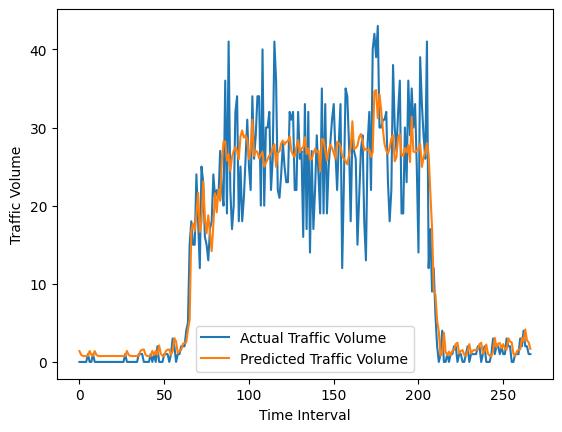

In [55]:
plt.plot(new_y_train, label='Actual Traffic Volume')
plt.plot(train_predictions, label='Predicted Traffic Volume')
plt.xlabel('Time Interval')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

In [77]:


a = df.index[:267]
a.shape
a = pd.to_datetime(a)


In [69]:
b = train_predictions.shape
b

(267,)

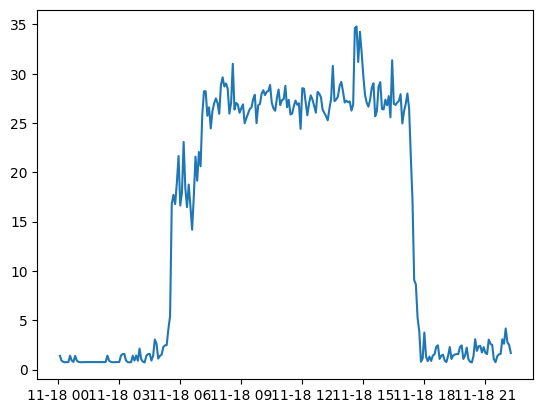

In [78]:
plt.plot(a, train_predictions)

In [79]:
list_of_tuples = list(zip(a, train_predictions))
list_of_tuples

[(Timestamp('2024-11-18 00:05:00'), np.float64(1.3864867389202118)),
 (Timestamp('2024-11-18 00:10:00'), np.float64(0.9008956849575043)),
 (Timestamp('2024-11-18 00:15:00'), np.float64(0.7769144177436829)),
 (Timestamp('2024-11-18 00:20:00'), np.float64(0.7418871819972992)),
 (Timestamp('2024-11-18 00:25:00'), np.float64(0.7510947585105896)),
 (Timestamp('2024-11-18 00:30:00'), np.float64(0.7568397223949432)),
 (Timestamp('2024-11-18 00:35:00'), np.float64(1.405344009399414)),
 (Timestamp('2024-11-18 00:40:00'), np.float64(0.9081643521785736)),
 (Timestamp('2024-11-18 00:45:00'), np.float64(0.7787033915519714)),
 (Timestamp('2024-11-18 00:50:00'), np.float64(1.3864867389202118)),
 (Timestamp('2024-11-18 00:55:00'), np.float64(0.9008956849575043)),
 (Timestamp('2024-11-18 01:00:00'), np.float64(0.7769144177436829)),
 (Timestamp('2024-11-18 01:05:00'), np.float64(0.7418871819972992)),
 (Timestamp('2024-11-18 01:10:00'), np.float64(0.7510947585105896)),
 (Timestamp('2024-11-18 01:15:00'),

In [85]:
predicted_traffic_volume = pd.DataFrame(list_of_tuples, columns=['TIME INTERVAL', 'PREDICTIONS'])
predicted_traffic_volume[100:150]

,TIME INTERVAL,PREDICTIONS
100,2024-11-18 08:25:00,25.958887
101,2024-11-18 08:30:00,27.051455
102,2024-11-18 08:35:00,31.009937
103,2024-11-18 08:40:00,26.368055
104,2024-11-18 08:45:00,27.026978
105,2024-11-18 08:50:00,26.859394
106,2024-11-18 08:55:00,26.035915
107,2024-11-18 09:00:00,26.496306
108,2024-11-18 09:05:00,26.891042
109,2024-11-18 09:10:00,24.974817


In [1]:
plt.plot(new_y_train, label='Actual Traffic Volume')
plt.plot(train_predictions, label='Predicted Traffic Volume')
plt.xlabel('Time Interval')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

NameError: name 'plt' is not defined